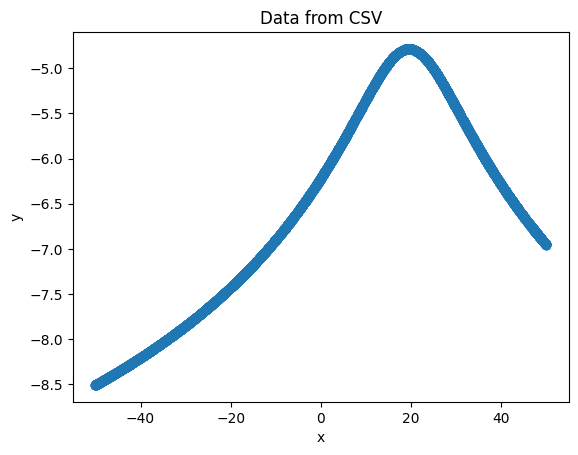

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일에서 데이터 불러오기
data = pd.read_csv('hw2_data.csv')

# 데이터 시각화
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data from CSV')
plt.show()


Epoch 0, Loss: 0.1905533493457871
Epoch 100, Loss: 0.03229101859390427
Epoch 200, Loss: 0.010565102987295183
Epoch 300, Loss: 0.005676032189013471
Epoch 400, Loss: 0.004088290262135013
Epoch 500, Loss: 0.0033052440791543456
Epoch 600, Loss: 0.0027867728591336265
Epoch 700, Loss: 0.002407613801481434
Epoch 800, Loss: 0.0025371399828276937
Epoch 900, Loss: 0.0022511296027744395

Final model:
w1: [[ 0.97062636 -0.36885383  1.94535502]]
b1: [[-0.17187393 -0.01149758 -2.24269954]]
w2: [[ 2.24462031 -0.3772196  -1.83958649]]
b2: [[-0.9871131]]


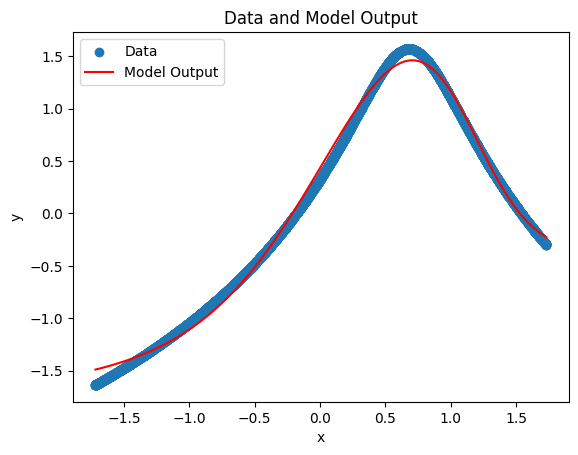

In [35]:
import numpy as np

# 데이터 불러오기
data = np.loadtxt("hw2_data.csv", delimiter=",", skiprows = 1)

# 데이터 정규화
x = (data[:, 0] - np.mean(data[:, 0])) / np.std(data[:, 0])
y = (data[:, 1] - np.mean(data[:, 1])) / np.std(data[:, 1])

# 파라미터 셋팅
input_size = 1
hidden_size = 3
output_size = 1
learning_rate = 0.0001
epochs = 1000

# 가중치 초기화
np.random.seed(42)
w1 = np.random.randn(input_size, hidden_size) * np.sqrt(2 / input_size)
b1 = np.zeros((1, hidden_size))
w2 = np.random.randn(hidden_size, output_size) * np.sqrt(2 / hidden_size)
b2 = np.zeros((1, output_size))

# 훈련
for epoch in range(epochs):

    # 순전파
    z1 = np.dot(x.reshape(-1, input_size), w1) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(a1, w2) + b2
    y_pred = z2

    # 손실 계산
    loss = 0.5 * np.mean((y_pred - y.reshape(-1, output_size))**2)

    # 역전파
    grad_y_pred = y_pred - y.reshape(-1, output_size)
    grad_w2 = np.dot(a1.T, grad_y_pred)
    grad_b2 = np.sum(grad_y_pred, axis=0, keepdims=True)
    grad_a1 = np.dot(grad_y_pred, w2.T)
    grad_z1 = grad_a1 * (1 - np.tanh(z1)**2)
    grad_w1 = np.dot(x.reshape(-1, input_size).T, grad_z1)
    grad_b1 = np.sum(grad_z1, axis=0, keepdims=True)

    # 경사 하강
    w1 -= learning_rate * grad_w1
    b1 -= learning_rate * grad_b1
    w2 -= learning_rate * grad_w2
    b2 -= learning_rate * grad_b2

    # 로그 출력
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# 최종 모델 출력
print("\nFinal model:")
print("w1:", w1)
print("b1:", b1)
print("w2:", w2.T)
print("b2:", b2)

# 데이터와 모델의 출력 시각화
x_values = np.linspace(min(x), max(x), 100).reshape(-1, 1)
z1 = np.dot(x_values, w1) + b1
a1 = np.tanh(z1)
z2 = np.dot(a1, w2) + b2
y_pred = z2.flatten()  # 아웃풋을 하나의 선으로 펼침

# 데이터와 모델의 출력 시각화
plt.scatter(x, y, label='Data')
plt.plot(x_values, y_pred, color='red', label='Model Output')
plt.title('Data and Model Output')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
